# Plotting 3: Cut-flow When Fixed $r_\mathrm{inv} = 0.3$ and Varying $\Lambda_d$

## 1. Import Packages

In [1]:
# The Python Standard Library

# The Third-Party Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (AutoLocator, MaxNLocator)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, LogLocator)

# My Packages
from plotting import plotting

# increase figure showing resolution
%config InlineBackend.figure_format = 'retina'

## 2. Load Datasets

In [2]:
path_data = '/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/'
dataset_csv = ['status23', 'status71', 'jet', 'met', 'jet_met',
               'n_jet', 'jj', 'jjj', 'jj_met', 'jjj_met']
dataset_npz = ['neutrinos', 'weight']
# fixed rinv = 0.3 and varying Lambdad = [5, 10, 100, 300]
Lambdad = [5, 10, 100, 300]

# load .csv & .npz into pd.DataFrame() & np.array()
dataset, weight_npz = [], []
for i, Ld in enumerate(Lambdad):
    print(f'{i + 1}. Lambdad = {Ld}')
    folder = f'Lambdad{int(Ld)}_rinv3/'
    file = f'_rinv3_Lambdad{int(Ld)}'
    print(path_data + folder + file)
    npz = np.load(path_data + folder + 'weight' + file + '_ckkwl.npz', allow_pickle=True)
    weight_npz.append(npz)
    for j, data in enumerate(dataset_csv):
        # print(j, folder + data + file + '_ckkwl.csv')
        df = pd.read_csv(path_data + folder + data + file + '_ckkwl.csv')
        dataset.append(df)
    print('-'*80)

1. Lambdad = 5
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad5_rinv3/_rinv3_Lambdad5
--------------------------------------------------------------------------------
2. Lambdad = 10
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad10_rinv3/_rinv3_Lambdad10
--------------------------------------------------------------------------------
3. Lambdad = 100
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad100_rinv3/_rinv3_Lambdad100
--------------------------------------------------------------------------------
4. Lambdad = 300
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad300_rinv3/_rinv3_Lambdad300
--------------------------------------------------------------------------------


In [3]:
# every 10 is a cycle
for j, data in enumerate(dataset_csv):
    print(j, data)

0 status23
1 status71
2 jet
3 met
4 jet_met
5 n_jet
6 jj
7 jjj
8 jj_met
9 jjj_met


### A. Simple check

In [4]:
print(f'{len(dataset)} data in dataset')
print(f'{len(weight_npz)} data in weight_npz')

40 data in dataset
4 data in weight_npz


In [5]:
Lambdad = [5, 10, 100, 300]
print('when fixed rinv = 0.3:')
for i in range(len(weight_npz)):
    print(f"* cross-section of Lambdad {Lambdad[i]} GeV = {np.sum(weight_npz[i]['weight_2'] * (10**9))} pb")

when fixed rinv = 0.3:
* cross-section of Lambdad 5 GeV = 0.5777782906857286 pb
* cross-section of Lambdad 10 GeV = 0.5769518776984781 pb
* cross-section of Lambdad 100 GeV = 0.5760819443684619 pb
* cross-section of Lambdad 300 GeV = 0.5760454566963117 pb


## 3. Plot

In [6]:
# * define global parameters

# text
# a. cross-section
text = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
        r'$r_\mathrm{inv} = 0.3$']
# b.luminosity
text_lum = [r'$\sqrt{s} = 13$ TeV, 139 $\mathrm{fb}^{-1}$', r'$m_{Z^\prime} = 1500$ GeV',
            r'$r_\mathrm{inv} = 0.3$']
text_xy = (0.05, 0.93)

# selected events
# a. truth level and preselection
selected_all = [np.arange(dataset[i].shape[0]) for i in range(0, len(dataset), 10)]
# b. dijet
selected_jj = [dataset[i+6]['selected'].to_numpy().astype('int64') for i in range(0, len(dataset), 10)]
# c. trijet
selected_jjj = [dataset[i+7]['selected'].to_numpy().astype('int64') for i in range(0, len(dataset), 10)]

# weight
weight = [weight_npz[i]['weight_2'] * (10**9) for i in range(len(weight_npz))]
weight_preselection = []
for i, d in enumerate([0, 10, 20, 30]):
    print(f'{i+1}. data {d}')
    d1 = dataset[d+2]['pT_1'].to_numpy()
    w = weight[i]
    weight_preselection.append(w[d1 >= 0])
weight_jj = [weight[i][selected_jj[i]] for i in range(len(weight_npz))]
weight_jjj = [weight[i][selected_jjj[i]] for i in range(len(weight_npz))]

print('*'*80)
# cross-section
xsection = np.array([np.sum(weight[i]) for i in range(len(weight))])
xsection_preselection = np.array([np.sum(weight_preselection[i]) for i in range(len(weight))])
xsection_jj = np.array([np.sum(weight_jj[i]) for i in range(len(weight))])
xsection_jjj = np.array([np.sum(weight_jjj[i]) for i in range(len(weight))])
print(f'------  Cross-section:')
print(f'* Before preselection: cross-section = {xsection} pb')
print(f'* Preselection: cross-section = {xsection_preselection} pb')
print(f'* Dijet: cross-section = {xsection_jj} pb')
print(f'* Trijet: cross-section = {xsection_jjj} pb')

print('-'*60)
# events
# 139 fb^(-1) = 139 pb^(-1) * 1000
luminosity = 139 * 1000
events = np.array([np.sum(weight[i] * luminosity) for i in range(len(weight))])
events_preselection = np.array([np.sum(weight_preselection[i] * luminosity) for i in range(len(weight))])
events_jj = np.array([np.sum(weight_jj[i] * luminosity) for i in range(len(weight))])
events_jjj = np.array([np.sum(weight_jjj[i] * luminosity) for i in range(len(weight))])
print(f'------  Number of events with luminosity = 139 fb^(-1):')
print(f'* Before preselection: number of events = {events}')
print(f'* Preselection: number of events = {events_preselection}')
print(f'* Dijet: number of events = {events_jj}')
print(f'* Trijet: number of events = {events_jjj}')

print('*'*80)
# print the information
Lambdad = np.array([5, 10, 100, 300])
for i, Ld in enumerate(Lambdad):
    print(f'* Lambdad = {Ld} GeV: cross-section = {np.sum(weight[i])} pb')
    print('-'*60)

1. data 0
2. data 10
3. data 20
4. data 30
********************************************************************************
------  Cross-section:
* Before preselection: cross-section = [0.57777829 0.57695188 0.57608194 0.57604546] pb
* Preselection: cross-section = [0.56311376 0.56516736 0.56506975 0.54943152] pb
* Dijet: cross-section = [0.50233748 0.51554989 0.52293215 0.46398755] pb
* Trijet: cross-section = [0.38612405 0.41365975 0.43921036 0.32826673] pb
------------------------------------------------------------
------  Number of events with luminosity = 139 fb^(-1):
* Before preselection: number of events = [80311.18240532 80196.31100009 80075.39026722 80070.31848079]
* Preselection: number of events = [78272.81293073 78558.26271752 78544.6957484  76370.98062231]
* Dijet: number of events = [69824.90933002 71661.43448303 72687.56918982 64494.26936815]
* Trijet: number of events = [53671.24332211 57498.7046752  61050.239934   45629.07560442]
************************************

In [7]:
n = [weight[i].shape[0] for i in range(len(weight))]
n_preselection = [weight_preselection[i].shape[0] for i in range(len(weight))]
n_jj = [weight_jj[i].shape[0] for i in range(len(weight))]
n_jjj = [weight_jjj[i].shape[0] for i in range(len(weight))]

print(f'------  Number of events for simulation:')
print(f'* Before preselection: number of events = {n}')
print(f'* Preselection: number of events = {n_preselection}')
print(f'* Dijet: number of events = {n_jj}')
print(f'* Trijet: number of events = {n_jjj}')

------  Number of events for simulation:
* Before preselection: number of events = [19373, 19352, 19337, 19349]
* Preselection: number of events = [18847, 18932, 18940, 18399]
* Dijet: number of events = [16706, 17169, 17457, 15383]
* Trijet: number of events = [12689, 13628, 14558, 10731]


In [8]:
print(f'preselection weight of Lambdad [5 10 100 300] GeV =')
weight_preselection

preselection weight of Lambdad [5 10 100 300] GeV =


[array([2.79496343e-05, 2.79496343e-05, 4.13660873e-05, ...,
        3.54384524e-05, 2.79496343e-05, 2.79496343e-05]),
 array([2.79496343e-05, 2.79496343e-05, 4.13660873e-05, ...,
        3.54384524e-05, 2.79496343e-05, 2.79496343e-05]),
 array([2.79496343e-05, 2.79496343e-05, 4.13660873e-05, ...,
        3.98954958e-05, 2.79496343e-05, 2.79496343e-05]),
 array([2.79496343e-05, 2.79496343e-05, 4.13660873e-05, ...,
        3.98954958e-05, 2.79496343e-05, 2.79496343e-05])]

In [9]:
selected_jj

[array([    0,     1,     4, ..., 19370, 19371, 19372]),
 array([    2,     3,     4, ..., 19349, 19350, 19351]),
 array([    0,     1,     2, ..., 19334, 19335, 19336]),
 array([    1,     2,     3, ..., 19344, 19346, 19347])]

In [10]:
Lambdad

array([  5,  10, 100, 300])

In [11]:
xsection

array([0.57777829, 0.57695188, 0.57608194, 0.57604546])

In [12]:
xsection_preselection

array([0.56311376, 0.56516736, 0.56506975, 0.54943152])

In [13]:
xsection_jj

array([0.50233748, 0.51554989, 0.52293215, 0.46398755])

In [14]:
xsection_jjj

array([0.38612405, 0.41365975, 0.43921036, 0.32826673])

### 3-1. Cross-section

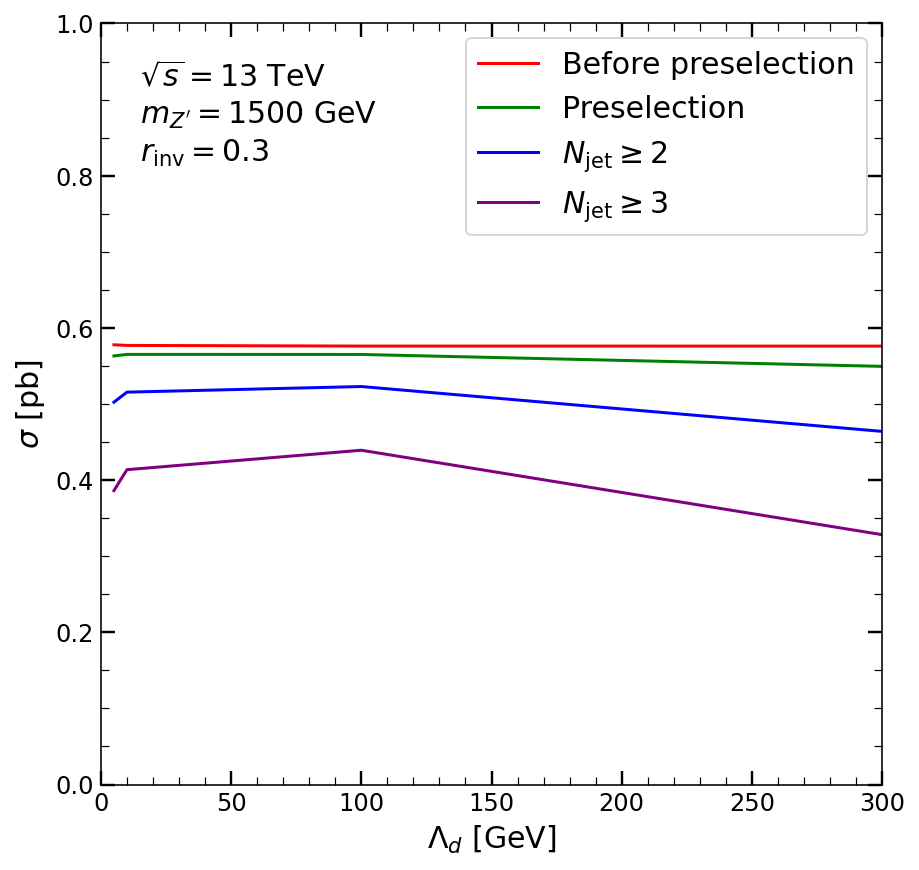

In [15]:
# 5. cross-section
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(Lambdad, xsection, color='red', label='Before preselection')
ax.plot(Lambdad, xsection_preselection, color='green', label='Preselection')
ax.plot(Lambdad, xsection_jj, color='blue', label=r'$N_\mathrm{jet} \geq 2$')
ax.plot(Lambdad, xsection_jjj, color='purple', label=r'$N_\mathrm{jet} \geq 3$')

# the axes legend
ax.legend(fontsize=15)

# x- & y-axis labels
ax.set_xlabel(r'$\Lambda_d$ [GeV]', fontsize=15)
ax.set_ylabel(r'$\sigma$ [pb]', fontsize=15)

# x- & y-axis view limits
ax.set_xlim((0, 300))
ax.set_ylim((0, 1))

# the appearance of ticks, tick labels, and gridlines of the Axes
ax.xaxis.set_major_locator(AutoLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_major_locator(AutoLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='both', direction='in', top=True, right=True)
ax.tick_params(which='major', length=7, width=1.2, labelsize=12)
ax.tick_params(which='minor', length=4)

# text
for j, tex in enumerate(text):
    ax.text(text_xy[0], text_xy[1] - j/20, tex,
            horizontalalignment='left', verticalalignment='center',
            transform=ax.transAxes, fontsize=15)

plt.savefig('./figures_3-cut-flow/fig_05-rinv3_Ld-xsection.pdf')
plt.show()

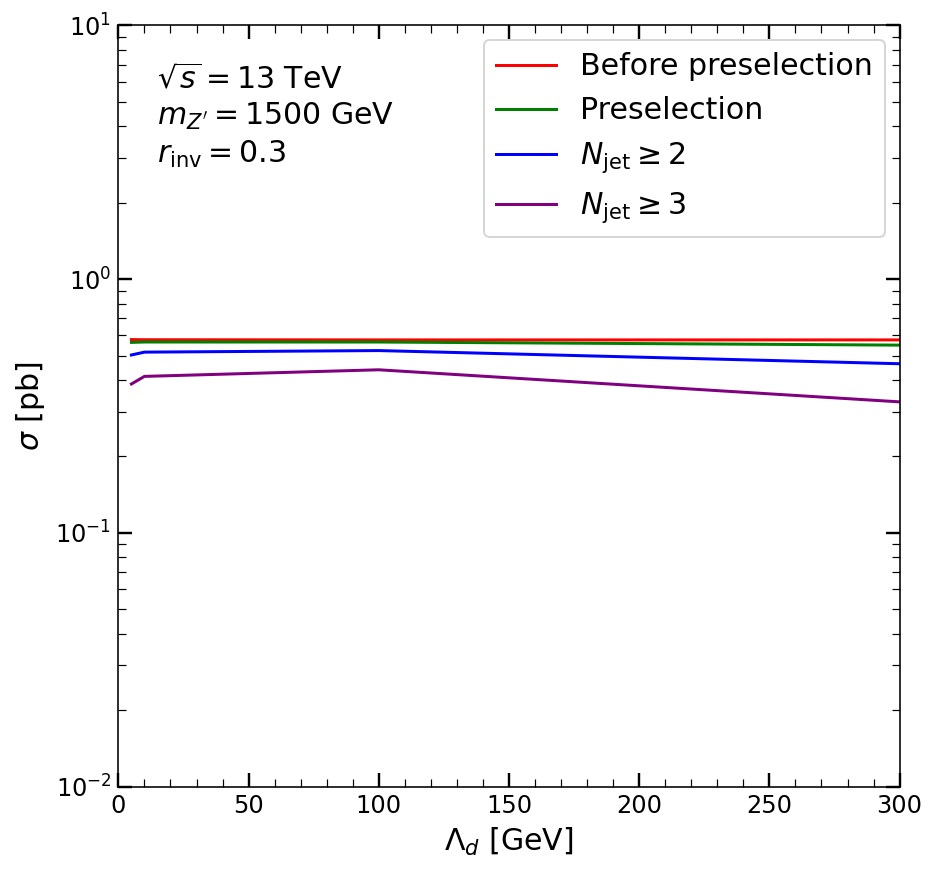

In [16]:
# 6. cross-section with log scale for y-axis
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(Lambdad, xsection, color='red', label='Before preselection')
ax.plot(Lambdad, xsection_preselection, color='green', label='Preselection')
ax.plot(Lambdad, xsection_jj, color='blue', label=r'$N_\mathrm{jet} \geq 2$')
ax.plot(Lambdad, xsection_jjj, color='purple', label=r'$N_\mathrm{jet} \geq 3$')

# the axes legend
ax.legend(fontsize=15)

# x- & y-axis labels
ax.set_xlabel(r'$\Lambda_d$ [GeV]', fontsize=15)
ax.set_ylabel(r'$\sigma$ [pb]', fontsize=15)

# y-axis scale
ax.set_yscale('log')

# x- & y-axis view limits
ax.set_xlim((0, 300))
ax.set_ylim((1/100, 10))

# the appearance of ticks, tick labels, and gridlines of the Axes
ax.xaxis.set_major_locator(AutoLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_major_locator(LogLocator())
ax.yaxis.set_minor_locator(LogLocator(base=10, subs='auto'))

ax.tick_params(which='both', direction='in', top=True, right=True)
ax.tick_params(which='major', length=7, width=1.2, labelsize=12)
ax.tick_params(which='minor', length=4)

# text
for j, tex in enumerate(text):
    ax.text(text_xy[0], text_xy[1] - j/20, tex,
            horizontalalignment='left', verticalalignment='center',
            transform=ax.transAxes, fontsize=15)

plt.savefig('./figures_3-cut-flow/fig_06-rinv3_Ld-xsection-ylog.pdf')
plt.show()

### 3-2. Number of events

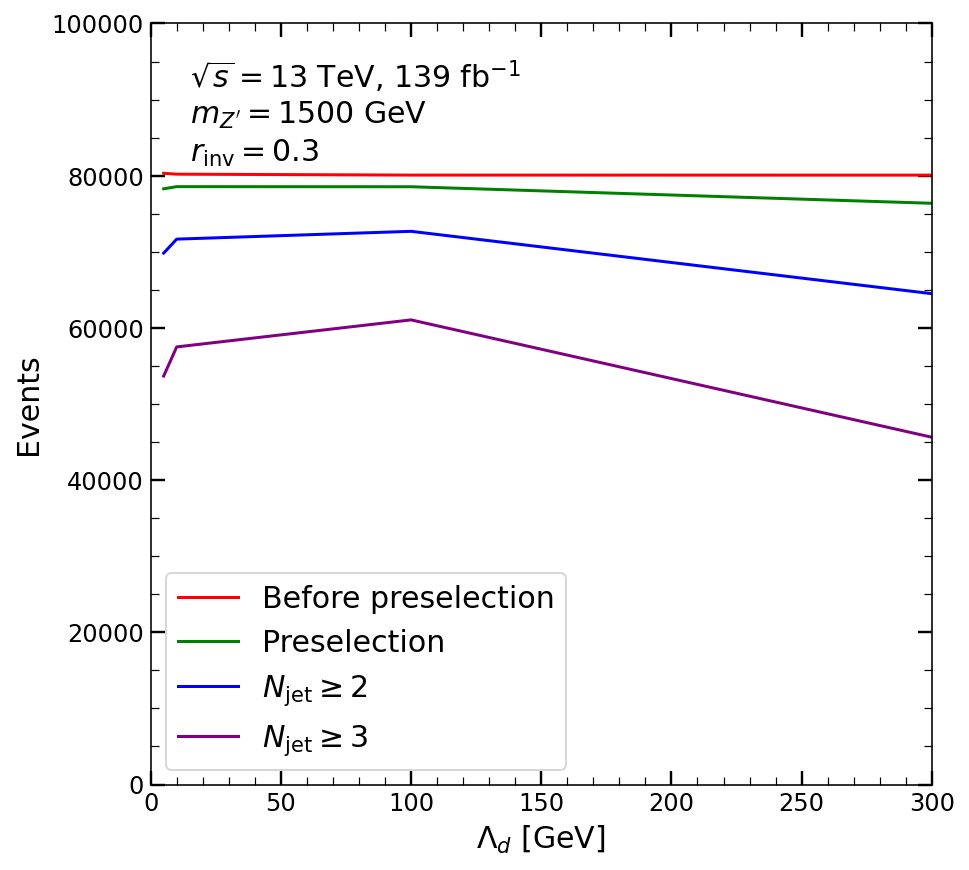

In [17]:
# 7. number of events
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(Lambdad, events, color='red', label='Before preselection')
ax.plot(Lambdad, events_preselection, color='green', label='Preselection')
ax.plot(Lambdad, events_jj, color='blue', label=r'$N_\mathrm{jet} \geq 2$')
ax.plot(Lambdad, events_jjj, color='purple', label=r'$N_\mathrm{jet} \geq 3$')

# the axes legend
ax.legend(loc='lower left', bbox_to_anchor=(0, 0), fontsize=15)

# x- & y-axis labels
ax.set_xlabel(r'$\Lambda_d$ [GeV]', fontsize=15)
ax.set_ylabel('Events', fontsize=15)

# x- & y-axis view limits
ax.set_xlim((0, 300))
ax.set_ylim((0, 100000))

# the appearance of ticks, tick labels, and gridlines of the Axes
ax.xaxis.set_major_locator(AutoLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_major_locator(AutoLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='both', direction='in', top=True, right=True)
ax.tick_params(which='major', length=7, width=1.2, labelsize=12)
ax.tick_params(which='minor', length=4)

# text
for j, tex in enumerate(text_lum):
    ax.text(text_xy[0], text_xy[1] - j/20, tex,
            horizontalalignment='left', verticalalignment='center',
            transform=ax.transAxes, fontsize=15)

plt.savefig('./figures_3-cut-flow/fig_07-rinv3_Ld-events.pdf')
plt.show()

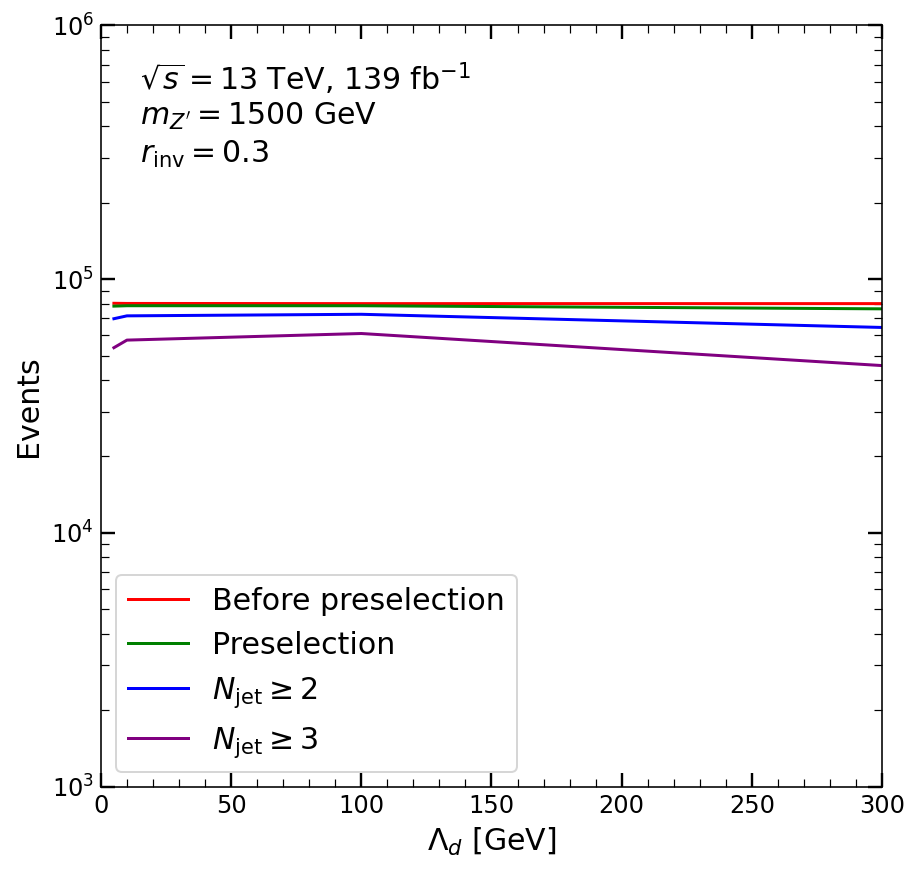

In [18]:
# 8. number of events with log scale for y-axis
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(Lambdad, events, color='red', label='Before preselection')
ax.plot(Lambdad, events_preselection, color='green', label='Preselection')
ax.plot(Lambdad, events_jj, color='blue', label=r'$N_\mathrm{jet} \geq 2$')
ax.plot(Lambdad, events_jjj, color='purple', label=r'$N_\mathrm{jet} \geq 3$')

# the axes legend
ax.legend(loc='lower left', bbox_to_anchor=(0, 0), fontsize=15)

# x- & y-axis labels
ax.set_xlabel(r'$\Lambda_d$ [GeV]', fontsize=15)
ax.set_ylabel('Events', fontsize=15)

# y-axis scale
ax.set_yscale('log')

# x- & y-axis view limits
ax.set_xlim((0, 300))
ax.set_ylim((1000, 1000000))

# the appearance of ticks, tick labels, and gridlines of the Axes
ax.xaxis.set_major_locator(AutoLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_major_locator(LogLocator())
ax.yaxis.set_minor_locator(LogLocator(base=10, subs='auto'))

ax.tick_params(which='both', direction='in', top=True, right=True)
ax.tick_params(which='major', length=7, width=1.2, labelsize=12)
ax.tick_params(which='minor', length=4)

# text
for j, tex in enumerate(text_lum):
    ax.text(text_xy[0], text_xy[1] - j/20, tex,
            horizontalalignment='left', verticalalignment='center',
            transform=ax.transAxes, fontsize=15)

plt.savefig('./figures_3-cut-flow/fig_08-rinv3_Ld-events-ylog.pdf')
plt.show()